In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

In [13]:
movies = pd.read_csv(r"C:\Users\p7522\Downloads\movie_data (1)\movies.csv")

In [15]:
movies.shape

(9742, 3)

In [16]:
rating = pd.read_csv(r"C:\Users\p7522\Downloads\movie_data (1)\ratings.csv")

In [17]:
rating.shape

(100836, 4)

In [18]:
rating


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


# How many unique "userId" are available in "ratings.csv"?


In [19]:

rating['userId'].nunique()

610

# Which movie has recieved maximum number of user ratings?


In [20]:

ratings_count = rating.groupby('movieId').size().reset_index(name='rating_count')

movie_ratings = pd.merge(ratings_count, df, on='movieId')


max_rated_movie = movie_ratings.loc[movie_ratings['rating_count'].idxmax()]

max_rated_movie_title = max_rated_movie['title']
max_rated_movie_ratings = max_rated_movie['rating_count']

print(f"The movie with the maximum number of user ratings is '{max_rated_movie_title}' with {max_rated_movie_ratings} ratings.")

The movie with the maximum number of user ratings is 'Forrest Gump (1994)' with 329 ratings.


# Select all the correct tags submitted by users to "Matrix, The (1999)" movie?


In [24]:

tags = pd.read_csv(r"C:\Users\p7522\Downloads\movie_data (1)\tags.csv")

In [25]:
tags.shape

(3683, 4)

# Select all the correct tags submitted by users to "Matrix, The (1999)" movie?


In [26]:

tags = pd.read_csv(r"C:\Users\p7522\Downloads\movie_data (1)\tags.csv")

# Merge the tags dataset with the movies dataset to get movie titles
movie_tags = pd.merge(tags, movies, on='movieId')

# Filter tags for the movie "Matrix, The (1999)"
matrix_tags = movie_tags[movie_tags['title'] == "Matrix, The (1999)"]

# Get unique tags submitted by users
unique_tags = matrix_tags['tag'].unique()

print("The tags submitted by users for 'Matrix, The (1999)' are:")
for tag in unique_tags:
    print(tag)

The tags submitted by users for 'Matrix, The (1999)' are:
martial arts
sci-fi
alternate universe
philosophy
post apocalyptic


# What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"


In [27]:


# Merge the ratings dataset with the movies dataset to get movie titles
movie_ratings = pd.merge(rating, movies, on='movieId')

# Filter ratings for the movie "Terminator 2: Judgment Day (1991)"
terminator_ratings = movie_ratings[movie_ratings['title'] == "Terminator 2: Judgment Day (1991)"]

# Calculate the average rating
average_rating = terminator_ratings['rating'].mean()

print(f"The average user rating for 'Terminator 2: Judgment Day (1991)' is {average_rating:.2f}.")


The average user rating for 'Terminator 2: Judgment Day (1991)' is 3.97.


# How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?


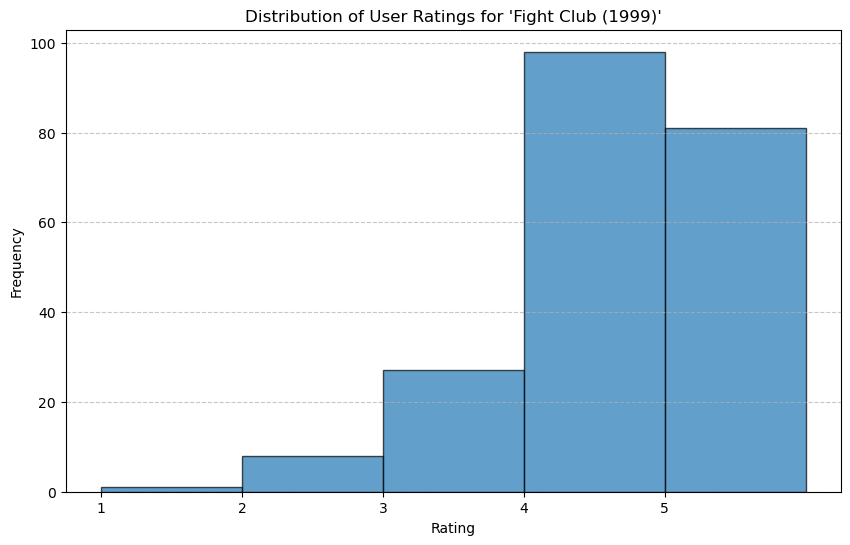

In [28]:

import matplotlib.pyplot as plt

# Merge the ratings dataset with the movies dataset to get movie titles
movie_ratings = pd.merge(rating, movies, on='movieId')

# Filter ratings for the movie "Fight Club (1999)"
fight_club_ratings = movie_ratings[movie_ratings['title'] == "Fight Club (1999)"]

# Plot the distribution of user ratings
plt.figure(figsize=(10, 6))
plt.hist(fight_club_ratings['rating'], bins=range(1, 7), edgecolor='black', alpha=0.7)
plt.title("Distribution of User Ratings for 'Fight Club (1999)'")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.xticks(range(1, 6))  # Ratings typically range from 1 to 5
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


# Which movie is the most popular based on  average user ratings?


In [29]:


# Merge the ratings dataset with the movies dataset to get movie titles
movie_ratings = pd.merge(rating, movies, on='movieId')

# List of movies to check
movies_of_interest = [
    "Godfather, The (1972)",
    "Shawshank Redemption, The (1994)",
    "Jumanji (1995)",
    "Wolf of Wall Street, The (2013)"
]

# Filter for the specified movies
filtered_ratings = movie_ratings[movie_ratings['title'].isin(movies_of_interest)]

# Calculate the average rating for each movie
average_ratings = filtered_ratings.groupby('title')['rating'].mean().reset_index()

# Find the movie with the highest average rating
most_popular_movie = average_ratings.loc[average_ratings['rating'].idxmax()]

# Display the result
most_popular_movie_title = most_popular_movie['title']
most_popular_movie_rating = most_popular_movie['rating']

print(f"The most popular movie based on average user ratings is '{most_popular_movie_title}' with an average rating of {most_popular_movie_rating:.2f}.")


The most popular movie based on average user ratings is 'Shawshank Redemption, The (1994)' with an average rating of 4.43.


# Select all the correct options which comes under top 5 popular movies based on number of user ratings


In [30]:

# Merge the ratings dataset with the movies dataset to get movie titles
movie_ratings = pd.merge(rating, movies, on='movieId')

# Aggregate the number of ratings per movie
ratings_count = movie_ratings.groupby('title').size().reset_index(name='rating_count')

# Find the top 5 movies based on number of ratings
top_5_movies = ratings_count.nlargest(5, 'rating_count')

# List of movies to check
movies_of_interest = [
    "Pulp Fiction (1994)",
    "Bad Boys (1995)",
    "Silence of the Lambs, The (1991)",
    "Matrix, The (1999)"
]

# Check which of the movies of interest are in the top 5
top_movies_of_interest = top_5_movies[top_5_movies['title'].isin(movies_of_interest)]

# Display the result
top_movies_of_interest_list = top_movies_of_interest['title'].tolist()

print("The movies from the list that are among the top 5 popular movies based on the number of user ratings are:")
for movie in top_movies_of_interest_list:
    print(movie)

The movies from the list that are among the top 5 popular movies based on the number of user ratings are:
Pulp Fiction (1994)
Silence of the Lambs, The (1991)
Matrix, The (1999)


# Which Sci-Fi movie is "third most popular" based on the number of user ratings?


In [31]:

# Merge the ratings dataset with the movies dataset to get movie titles
movie_ratings = pd.merge(rating, movies, on='movieId')

# Filter for Sci-Fi movies
sci_fi_movies = movies[movies['genres'].str.contains('Sci-Fi', case=False)]

# Merge the filtered Sci-Fi movies with the ratings dataset
sci_fi_ratings = pd.merge(rating, sci_fi_movies, on='movieId')

# Aggregate the number of ratings per Sci-Fi movie
ratings_count_sci_fi = sci_fi_ratings.groupby('title').size().reset_index(name='rating_count')

# Sort the Sci-Fi movies by number of ratings in descending order
sorted_sci_fi_movies = ratings_count_sci_fi.sort_values(by='rating_count', ascending=False)

# Find the third most popular Sci-Fi movie
third_most_popular_sci_fi = sorted_sci_fi_movies.iloc[2]  # index 2 corresponds to the third entry

# Display the result
third_most_popular_movie_title = third_most_popular_sci_fi['title']
third_most_popular_movie_rating_count = third_most_popular_sci_fi['rating_count']

print(f"The third most popular Sci-Fi movie based on the number of user ratings is '{third_most_popular_movie_title}' with {third_most_popular_movie_rating_count} ratings.")

The third most popular Sci-Fi movie based on the number of user ratings is 'Jurassic Park (1993)' with 238 ratings.


In [51]:
links = pd.read_csv(r"C:\Users\p7522\Downloads\movie_data (1)\links.csv")

In [52]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [53]:
links.shape

(9742, 3)

In [54]:
grouped_ratings = rating.groupby('movieId').agg(rating_count=('rating', 'count'),
                                                 average_rating=('rating', 'mean')).reset_index()

In [55]:
grouped_ratings


,movieId,rating_count,average_rating
0,1,215,3.920930
1,2,110,3.431818
2,3,52,3.259615
3,4,7,2.357143
4,5,49,3.071429
...,...,...,...
9719,193581,1,4.000000
9720,193583,1,3.500000
9721,193585,1,3.500000
9722,193587,1,3.500000


In [56]:
merged_df = pd.merge(movies, grouped_ratings, on='movieId')
merged_df.head()

,movieId,title,genres,rating_count,average_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143
4,5,Father of the Bride Part II (1995),Comedy,49,3.071429


In [57]:
popular_movies = merged_df[merged_df['rating_count'] > 50]
popular_movies.head()

,movieId,title,genres,rating_count,average_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185


In [58]:
movies_with_links = pd.merge(popular_movies, links, on='movieId')
movies_with_links.head()

,movieId,title,genres,rating_count,average_rating,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0


In [59]:
def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'}
    
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    imdb_rating = soup.find('span', attrs={'class': 'sc-eb51e184-1 ljxVSS'})
    return imdb_rating.text if imdb_rating else np.nan

In [ ]:
movies_with_links['imdb_rating'] = movies_with_links['imdbId'].apply(lambda x: scrapper(x))
movies_with_links.head()

In [ ]:
highest_rated_movie = movies_with_links.loc[movies_with_links['imdb_rating'].astype(float).idxmax()]
highest_rated_movie

In [ ]:
print(f"The movie with the highest IMDb rating is: '{highest_rated_movie['title']}' with movieId: {highest_rated_movie['movieId']} 
        and an IMDb rating of {highest_rated_movie['imdb_rating']}")

# Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [ ]:
movies_with_links[movies_with_links['genres'].str.contains('Sci-Fi')]

In [ ]:
sci_fi_movies = movies_with_links[movies_with_links['genres'].str.contains('Sci-Fi')]
sci_fi_movies.head()

In [ ]:
sci_fi_movies.loc[sci_fi_movies['imdb_rating'].astype(float).idxmax()]


In [ ]:
highest_rated_sci_fi_movie = sci_fi_movies.loc[sci_fi_movies['imdb_rating'].astype(float).idxmax()]
highest_rated_sci_fi_movie

In [ ]:
print(f"The Sci-Fi movie with the highest IMDb rating is: '{highest_rated_sci_fi_movie['title']}' with movieId: {highest_rated_sci_fi_movie['movieId']} and an IMDb rating of {highest_rated_sci_fi_movie['imdb_rating']}")
